In [1]:
import librosa
import librosa.display
import pyaudio
import numpy as np
import IPython.display as ipd
import wave
import matplotlib.pyplot as plt

OUTPUT = "./output.wav"
CHANNELS = 1
FORMAT = pyaudio.paInt16

In [2]:
def detect_pitch(pitches, magnitudes,t):
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]
  return pitch

***Start recording...
***End recording
(220500,) 44100
(1025, 431)
D4
(12, 431)


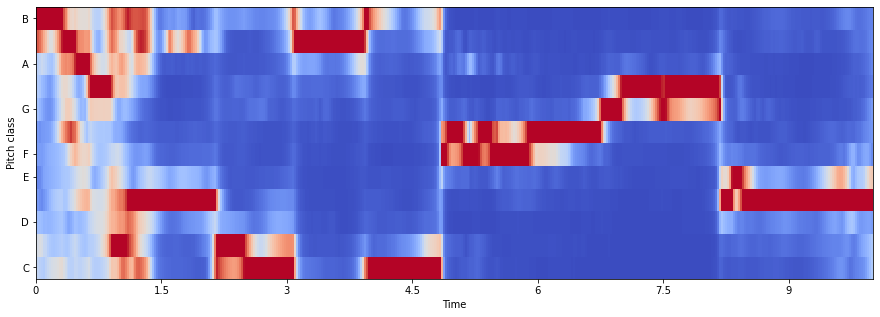

In [4]:
RATE = 44100
CHUNK = int(RATE/20) # RATE/number of updates per second
RECORD_TIME = 5

p = pyaudio.PyAudio()
stream = p.open(
    format = FORMAT,
    channels = 1,
    rate = RATE,
    input = True,
    frames_per_buffer = CHUNK)

print("***Start recording")
frames = []
for i in range(int(RECORD_TIME*RATE/CHUNK)):
    data = stream.read(CHUNK)
    frames.append(data)
print("***End recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(OUTPUT, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

x, sr = librosa.load('./output.wav', sr=RATE)
print(x.shape, sr)

pitches, magnitudes = librosa.piptrack(y=x, sr=sr)
print(pitches.shape)

# TOTO: higher sampling rate, change pitch when hz_to_note changes, draw a plot
print(librosa.hz_to_note(detect_pitch(pitches, magnitudes, 50)))

x_harm = librosa.effects.harmonic(x, margin=16)
chromagram = librosa.feature.chroma_cqt(x_harm, sr=sr)
print(chromagram.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [ ]:
# TODO: 
# 1. more plots based on https://blog.csdn.net/MAILLIBIN/article/details/89764853
# 2. higher sampling rate, change pitch when hz_to_note changes, draw a plot that include all 9 area
# 3. animation mode as an option
# 4. directly convert to guitor map: clustering algorithms?
# 